## <span style="color:blue">  Laboratorio di Simulazione Numerica - Esercitazione 02</span>

### Esercizio 02.1

L'obiettivo è calcolare il seguente integrale 1D campionando una distribuzione uniforme in [0,1]
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd

In [2]:
data1 = pd.read_csv("Esercizio_02_1/Es02_1_01.csv", sep=',')

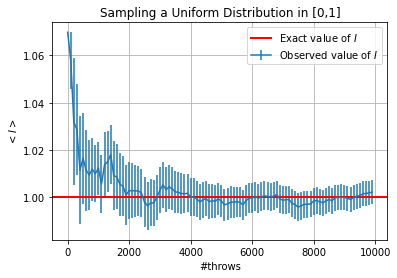

In [3]:
M=10000              # Numero totale di lanci
N=100                 # Numero di blocchi
L=int(M/N)            # Numero di lanci in ogni blocco
x = np.arange(N)      # [0,1,2,...,N-1]

x*=L # Numero di lanci = blocco * (Numero di lanci in ogni blocco)
plt.errorbar(x,data1['Cumulative_Average'],yerr=data1['Statistical_Uncertainty'],label='Observed value of $I$')
plt.axhline(y=1, color='red', linestyle='-', linewidth=2, label='Exact value of $I$')
plt.xlabel('#throws')
plt.ylabel('$<I>$')
plt.title('Sampling a Uniform Distribution in [0,1]')
plt.grid(True)
plt.legend()
plt.show()

In questo plot ho mostrato in blu l'andamento del valore stimato di $I$ campionando una distribuzione uniforme in [0,1], in funzione del numero totale di throws (lanci), mentre in rosso ho mostrato il valore esatto di $I=1$.
L'andamento blu è stato ottenuto tramite il metodo della media a blocchi; l'incertezza statistica corrisponde alla deviazione standard della media per la stima di $I$.

Ora provo a calcolare lo stesso integrale utilizzando **importance sampling**, cioè campionando una probabilità non uniforme in [0,1].

Considero una densità di probabilità simile all'integranda
$$p(x) = \frac{\pi}{2}(1-x^2)$$

Calcolo la normalizzazione
$$\int_0^1 \frac{\pi}{2}(1-x^2) dx = \frac{\pi}{3}$$

In questo modo posso riscrivere l'integrale $I$ nel seguente modo
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = \int_0^1 g(x)p(x) dx$$
con $$p(x) = \frac{3}{2}(1-x^2) ,  g(x) = \frac{\pi}{3} \frac{\cos(\pi x/2)}{1-x^2}$$

In [4]:
data2 = pd.read_csv("Esercizio_02_1/Es02_1_02.csv", sep=',')

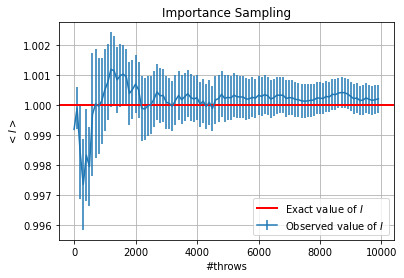

In [5]:
plt.errorbar(x,data2['Cumulative_Average'],yerr=data2['Statistical_Uncertainty'],label='Observed value of $I$')
plt.axhline(y=1, color='red', linestyle='-', linewidth=2, label='Exact value of $I$')
plt.xlabel('#throws')
plt.ylabel('$<I>$')
plt.title('Importance Sampling')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

In questo plot ho mostrato in blu l'andamento del valore stimato di $I$ campionando una probabilità non uniforme in [0,1] (importance sampling), in funzione del numero totale di throws (lanci), mentre in rosso ho mostrato il valore esatto di $I=1$.
L'andamento blu è stato ottenuto tramite il metodo della media a blocchi; l'incertezza statistica corrisponde alla deviazione standard della media per la stima di $I$.

Paragonando questi due plot, si può osservare che l'incertezza statistica associata alla stima dell'integrale tramite importance sampling ($\simeq 10^{-4}$) è decisamente minore (circa 10 volte) di quella associata al campionamento di una distribuzione uniforme ($\simeq 10^{-3}$). L'importance sampling infatti riduce l'incertezza statistica concentrando i campioni nelle regioni dove l'integranda ha valori più significativi: campionando più frequentemente nelle regioni di maggior importanza, si ottiene una stima più stabile e accurata dell'integrale.

### Esercizio 02.2

L'obiettivo è quello di generare un **Random Walk 3D** su un **reticolo cubico** con costante reticolare $a=1$. Ad ogni step temporale discreto il walker fa un passo avanti o indietro di lunghezza pari ad $a$ in una delle 3 direzioni principali del reticolo: $x$, $y$ o $z$.

In [6]:
data3 = pd.read_csv("Esercizio_02_2/Es02_2_01.csv", sep=',')

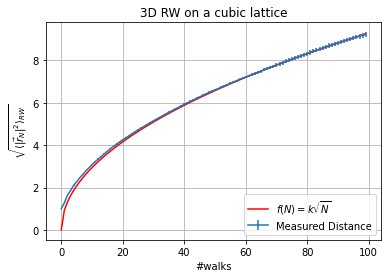

In [7]:
M=10000               # Numero totale di rw 
N=100                 # Numero di blocchi
L=int(M/N)            # Numero di rw in ogni blocco
x = np.arange(N)      # [0,1,2,...,N-1]

plt.title('3D RW on a cubic lattice')
plt.xlabel('#walks')
plt.ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$')
plt.errorbar(x,data3['Average_Value'],yerr=data3['Statistical_Uncertainty'],label='Measured Distance')
plt.plot(x, 0.93*np.sqrt(x), color="red", label='$f(N)=k\sqrt{N}$')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In questo plot viene presentato l'andamento, in blu, di $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$, che rappresenta la radice quadrata del valor medio del modulo quadro della distanza dal centro, in funzione dei passi (walks), nel caso di un Random Walk 3D su un reticolo cubico. Dalla figura si evince che le incertezze statistiche associate alla stima di $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ ( da $\simeq 10^{-3}$ a $\simeq 10^{-1}$) sono decisamente minori rispetto ai valori medi; per questo motivo sembra che le barre d'errore non siano presentate nel plot. E' possibile anche osservare che questo andamento fitta molto bene con $f(N)=k\sqrt{N}$, con $N$ che rappresenta il numero totale di walks (curva rossa, $k=0.93$).

Ora provo a generare un Random Walk 3D nel **continuo**. Ad ogni step temporale discreto il walker fa un passo di lunghezza pari ad $a$ lungo una direzione casuale ottenuta campionando uniformemente l'angolo solido: $\theta \in [0,\pi]$ e $\phi \in [0,2\pi]$.

In [8]:
data4 = pd.read_csv("Esercizio_02_2/Es02_2_02.csv", sep=',')

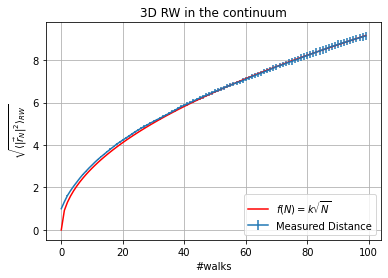

In [9]:
plt.title('3D RW in the continuum')
plt.xlabel('#walks')
plt.ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$')
plt.errorbar(x,data4['Average_Value'],yerr=data4['Statistical_Uncertainty'],label='Measured Distance')
plt.plot(x, 0.92*np.sqrt(x), color="red", label='$f(N)=k\sqrt{N}$')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In questo plot viene presentato l'andamento, in blu, di $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$, che rappresenta la radice quadrata del valor medio del modulo quadro della distanza dal centro, in funzione dei passi (walks), nel caso di un Random Walk 3D nel continuo. Dalla figura si evince che le incertezze statistiche associate alla stima di $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ ( da $\simeq 10^{-3}$ a $\simeq 10^{-1}$) sono decisamente minori rispetto ai valori medi. E' possibile anche osservare che questo andamento fitta molto bene con $f(N)=k\sqrt{N}$, con $N$ che rappresenta il numero totale di walks (curva rossa, $k=0.92$).

In un processo di diffusione la distanza media di una particella che si muove in modo casuale ad un certo tempo è tale per cui $\langle r^2 \rangle \propto t$; nel caso di un Random Walk, ci si aspetta che la distanza media dall'origine $\sqrt{\langle r^2 \rangle} \propto \sqrt{N}$, con $N$ che rappresenta il numero di passi.
In quanto i miei dati seguono in entrambi i casi una legge del tipo $f(N)=k\sqrt{N}$, questo è un chiaro segno che **il processo in questione è di tipo diffusivo**: la costante di proporzionalità $k$ dipende dal sistema, ma la dipendenza dalla radice quadrata del numero di passi (o del tempo) è un tratto distintivo della diffusione. 